In [32]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import MultiPolygon
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
def scale(num):
    #create 14 digits by padding 0's if needed
    num1 = str(abs(num[0]))
    num2 = str(abs(num[1]))
    
    if len(num1) < 15:
        num1 = num1.ljust(15, '0')
    elif len(num1) > 15:
        num1 = num1[:15]
    
    if len(num2) < 15:
        num2 = num2.ljust(15, '0')
    elif len(num2) > 15:
        num2 = num2[:15]
    
    #shift decimal for 8 decimal places
    return np.array([-1.*(float(num1) * (10**5)),-1.*(float(num2) * (10**5))])

In [17]:
def center(coord):
    # coord is an np array containing lat and long
    
    #find mean
    mean = coord.mean()
    
    #center by subtracting the mean
    coord = coord - mean
    return coord

In [18]:
#4th - divide into cells
def divide_cells(grid, cell_num):
    pass

In [19]:
#1st - read in the csv file
def get_data(filename):
    data = pd.read_csv(filename)
    vertex = data["SHAPE"]
    return vertex

#2nd - clean data
def prep_row(row):
    #pull off 'MULTIPOLYGON ((' leaving one set of parentheses around string
    cleaned = row[16:-3]
    return cleaned # should look like '(lon lat, lon lat,...), (lon lat, lon lat...), (.....)'

def find_multi(row):
    found = False
    if '), (' in row:
        found = True
    return found

    """vertex = data.split(" ")[1:]
    print vertex[1::2]
    first = vertex[0].split("(")[3]
    last = vertex[-1].split(")")[0]
    body = vertex[1:-1].split(",")
    vertex = [first] + vertex[1:-1] + [last]
    print vertex
    print map(float, vertex)
    y = map(float, vertex)
    y = zip(*[iter(y)]*2)
    print y"""

In [20]:
def get_poly(data):
#     vertex = data.replace(',', '')
    vertex = data.split(",")
    vertex = [item.strip() for item in vertex ]
    vertex = [(float(item.split(" ")[0]) ,float(item.split(" ")[1])) for item in vertex]
    print np.asarray(vertex)

In [21]:
"""def get_multi(multi):
    fxn = multi[15:-2]
    fxn = fxn.replace("), (", ")&(")
    fxn = fxn.split("&")
    # now put tuples in multigon
    fxn = [(float(item.split(" ")[term]), float(item.split(" ")[term])) for item in fxn for term in item]
    print fxn"""

def get_multi(multi):
    #replace '), (' which separate polygons to ')&(' to be able to split properly
    fxn = multi.replace("), (", "&")
    fxn = fxn.split("&") 
    multi_2d = []
    for i in range(len(fxn)):
        multi_2d.append(get_poly(fxn[i])) 
    #converts to array
    multi_list = np.asarray(multi_2d)
    return multi_list.reshape((len(multi_list), 1))

In [22]:
def parse_shapes(one_row):
    is_multi = find_multi(one_row)
    if is_multi == True:
        prepped = prep_row(one_row)
        prepd_split = get_multi(prepped)
        return (prepd_split)
    else:
        prepped = prep_row(one_row)
        prepd_cleand = get_poly(prepped)
        return (prepd_cleand)

In [23]:
def find_randpoints(ranges1, ranges2):
    #ranges is an array of either lat or long
    point1 = np.random.uniform(ranges1[0], ranges1[1], 4)
    point2 = np.random.uniform(ranges2[0], ranges2[1], 4)
    return point1, point2

In [24]:
#Now figure out how to apply to each row
#Testing
data = get_data("small_scale_data.csv")
poly_test = parse_shapes(data[16])

[[-71.14149442  42.36167523]
 [-71.14168146  42.36223653]
 [-71.14172739  42.36224104]
 [-71.14238367  42.36212808]
 [-71.14224341  42.36172475]
 [-71.14219564  42.36147289]
 [-71.14176642  42.36143073]
 [-71.1416392   42.36139344]
 [-71.14155985  42.36154743]
 [-71.14149442  42.36167523]]
[[-71.1419561   42.36175682]
 [-71.14210376  42.36172712]
 [-71.14219224  42.36207455]
 [-71.14206585  42.36209882]
 [-71.1419561   42.36175682]]


In [25]:
lat = np.array([-71.14003, -71.13748])
lon = np.array([42.35827, 42.3601])
lat_rand, lon_rand = find_randpoints(lat, lon)
print lat_rand, lon_rand

[-71.13756874 -71.13979244 -71.13783168 -71.13973272] [ 42.35840437  42.35903368  42.3593909   42.35831011]


In [29]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
# print(polygon.contains(point))

# ran_point0 = Point(lat_rand[0], lon_rand[0])
# ran_point1 = Point(lat_rand[1], lon_rand[1])
# ran_point2 = Point(lat_rand[2], lon_rand[2])
# ran_point3 = Point(lat_rand[3], lon_rand[3])
# polygon = Polygon(poly_test)
# print(polygon.contains(ran_point0))
# print(polygon.contains(ran_point1))
# print(polygon.contains(ran_point2))
# print(polygon.contains(ran_point3))

# mult_poly = MultiPolygon(polygon)
# print mult_poly

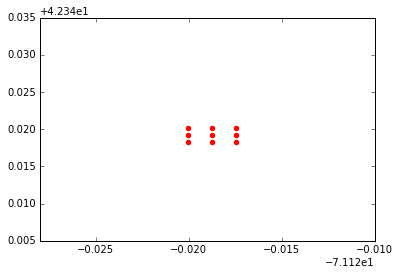

In [94]:
#creating Grid (lat (x), long(y))
x_min = -71.13748
x_max = -71.14003

y_min = 42.35827
y_max = 42.3601

x_s = np.linspace(x_min, x_max, 3)
y_s = np.linspace(y_min, y_max, 3)

x_coord, y_coord = np.meshgrid(x_s, y_s)

x_shift = np.abs(x_s[2]) - np.abs(x_s[1])
y_shift = np.abs(y_s[2]) - np.abs(y_s[1])

plt.scatter(x_coord, y_coord, color="red")
plt.show()

# scaled = x_shift

# plt.xlim([min(x_s), max(x_s)])
# plt.ylim([y_s.min(), y_s.max()])

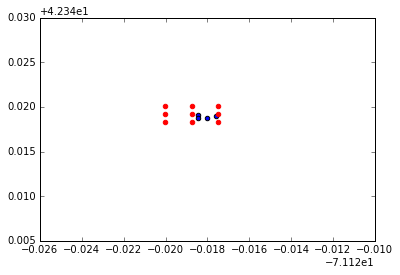

In [102]:
rand_x_grid1 = np.random.uniform(x_coord[0,0], x_coord[0,1], 4)
rand_y_grid1 = np.random.uniform(y_coord[0,0], y_coord[1,0], 4)

rand_pts_grid1 = np.array(zip(rand_x_grid1, rand_y_grid1))

plt.scatter(rand_pts_grid1[:, 0], rand_pts_grid1[:, 1]) #x_s and y_s
plt.scatter(x_coord, y_coord, color="red")
plt.show()

[[-71.1379731   42.35837733]
 [-71.13825835  42.35872466]
 [-71.13869289  42.35867027]
 [-71.13817253  42.35892265]] 

[[-71.1379731   42.35929233]
 [-71.13825835  42.35963966]
 [-71.13869289  42.35958527]
 [-71.13817253  42.35983765]]


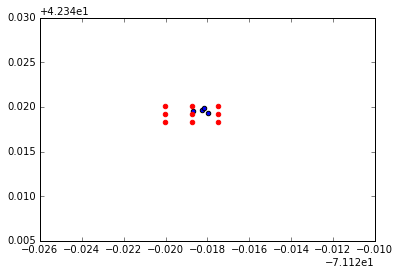

In [96]:
rand_pts_grid2 = rand_pts_grid1[:] #making a copy
print rand_pts_grid2, "\n"
rand_pts_grid2[:, 1] += y_shift
print rand_pts_grid2

plt.scatter(rand_pts_grid2[:, 0], rand_pts_grid2[:, 1]) #x_s and y_s
plt.scatter(x_coord, y_coord, color="red")
plt.show()

[[-71.1379731   42.35929233]
 [-71.13825835  42.35963966]
 [-71.13869289  42.35958527]
 [-71.13817253  42.35983765]] 

[[-71.1392481   42.35929233]
 [-71.13953335  42.35963966]
 [-71.13996789  42.35958527]
 [-71.13944753  42.35983765]]


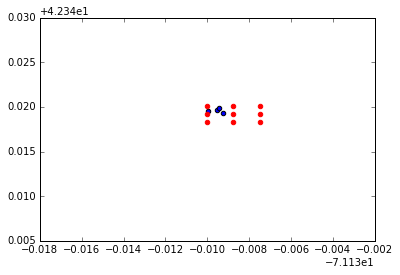

In [97]:
rand_pts_grid3 = rand_pts_grid2[:] #making a copy
print rand_pts_grid3, "\n"
rand_pts_grid2[:, 0] -= x_shift
print rand_pts_grid3

plt.scatter(rand_pts_grid3[:, 0], rand_pts_grid3[:, 1]) #x_s and y_s
plt.scatter(x_coord, y_coord, color="red")
plt.show()

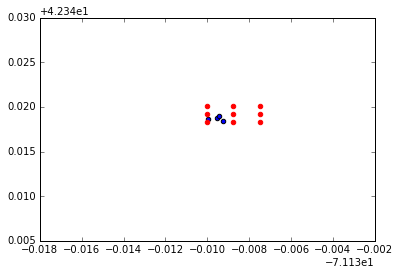

In [98]:
rand_pts_grid4 = rand_pts_grid3[:] #making a copy
rand_pts_grid4[:, 1] -= y_shift

plt.scatter(rand_pts_grid4[:, 0], rand_pts_grid4[:, 1]) #x_s and y_s
plt.scatter(x_coord, y_coord, color="red")
plt.show()

In [121]:
#creating Grid (lat (x), long(y))
def generate_grid(x, y, cell_num):
    #Creates the grid
    x_min = x[0]
    x_max = x[1]

    y_min = y[0]
    y_max = y[1]

    x_s = np.linspace(x_min, x_max, cell_num)
    y_s = np.linspace(y_min, y_max, cell_num)

    x_coord, y_coord = np.meshgrid(x_s, y_s)

    x_shift = np.abs(x_s[1]) - np.abs(x_s[0])
    y_shift = np.abs(y_s[1]) - np.abs(y_s[0])
    return x_coord, y_coord, x_shift, y_shift

def gen_rand_pts(grid_x, grid_y, x_shift, y_shift, num):
#     print grid_x.shape
#     print grid_y.shape
    rand_x_grid1 = np.random.uniform(grid_x[0,0], grid_x[0,1], num)
    rand_y_grid1 = np.random.uniform(grid_y[0,0], grid_y[1,0], num)
    old_grid_pts = np.array(zip(rand_x_grid1, rand_y_grid1)) 
    
    delta_x = x_shift
    delta_y = y_shift
    
    for row in range(len(grid_x)):
        for col in range(len(grid_y)):
            new_grid_pts = old_grid_pts[:]
            new_grid_pts[:, 0] += row * delta_x #shift horizontally
            new_grid_pts[:, 1] += col * delta_y #shift vertically
            plt.scatter(new_grid_pts[:, 0], new_grid_pts[:, 1])
    plt.show()
    return new_grid_pts

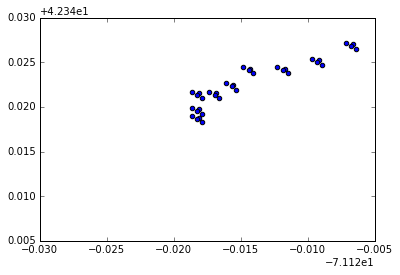

In [122]:
"""Testing the function above"""
x = [-71.13748, -71.14003]
y = [42.35827, 42.3601]

x_coord, y_coord, x_shift, y_shift = generate_grid(x, y, 3)

new_grid_pts = gen_rand_pts(x_coord, y_coord, x_shift, y_shift, 4)